In [110]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
dir_path = "../Data/annotations/"
ano = "captions_train2017.json"
keyword_file = "kerwords.json"

In [2]:
with open(dir_path+ano, 'r') as open_ano:
    ano_json = json.load(open_ano)

with open(dir_path+ano, 'r') as open_key:
    keywords = json.load(open_key)
open_ano.close()
open_key.close()

In [14]:
ano_json['images'][0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [16]:
ano_json['annotations'][0]['caption']

'A bicycle replica with a clock as the front wheel.'

In [17]:
annotations = pd.DataFrame(ano_json['annotations'])

In [19]:
images = pd.DataFrame(ano_json['images'])

In [26]:
annotations['caption'][0]

'A bicycle replica with a clock as the front wheel.'

In [171]:
keyword = ['blaze', 'burning',  "earthquake","typhoon", "cyclone", "hurricane"]
exclude_keyword = ['blazer']
k_image_id = []

0         False
1         False
2         False
3         False
4         False
          ...  
591748    False
591749    False
591750    False
591751    False
591752    False
Name: caption, Length: 591753, dtype: bool

In [203]:
## 특정 키워드 caption에 포함된다면 hooking

find = annotations[annotations['caption'].str.contains('blaze', case=False)]

for i in keyword:
    find2 = annotations[annotations['caption'].str.contains(i, case=False)]
    find = pd.concat([find,find2], ignore_index=True)
    print(f'keyword : {i} // found: {len(find)}')

## 결측지 유발 키워드 삭제
for i in exclude_keyword:
    find = find[~find['caption'].str.contains(i, case=False)]
    print(f'delete keyword: {i} found: {len(find)}')

## 중복 이미지 삭제 (한 이미지에 대한 여러 caption)
find.drop_duplicates(['image_id'], inplace=True ,ignore_index = True, keep = 'first')
print(f'droped duplicates img from multiple captions, After dropped: {len(find)}')
## 인덱스 정렬
find.reset_index(inplace=True, drop=True)

keyword : blaze // found: 112
keyword : burning // found: 184
keyword : earthquake // found: 184
keyword : typhoon // found: 184
keyword : cyclone // found: 185
keyword : hurricane // found: 189
delete keyword: blazer found: 95
droped duplicates img from multiple captions, After dropped: 80


In [198]:
find

image_id      id                                            caption
0     486171  138671  A brown horse with white blaze trotting on the...
1     398183  271020  Dirt bike riders blaze through a path in the w...
2     216015   42866  Firefighters, next to their trucks, fight a bl...
3     369576  395749  The firetruck carried the firefighters to the ...
4     213945   93405       A brown horse with a white blaze in a field.
..       ...     ...                                                ...
81    363248  184452     a giraffe standing in front of a cyclone fence
82     83065   38389  The weatherman is reporting about the strong h...
83    369697  389633      A vintage photo of hurricane damage to boats.
84    264183   93964    Hand decorated hurricane vases at a flea market
85    374463  813751  A large teddy bear wearing a Miami Hurricanes ...

[86 rows x 3 columns]

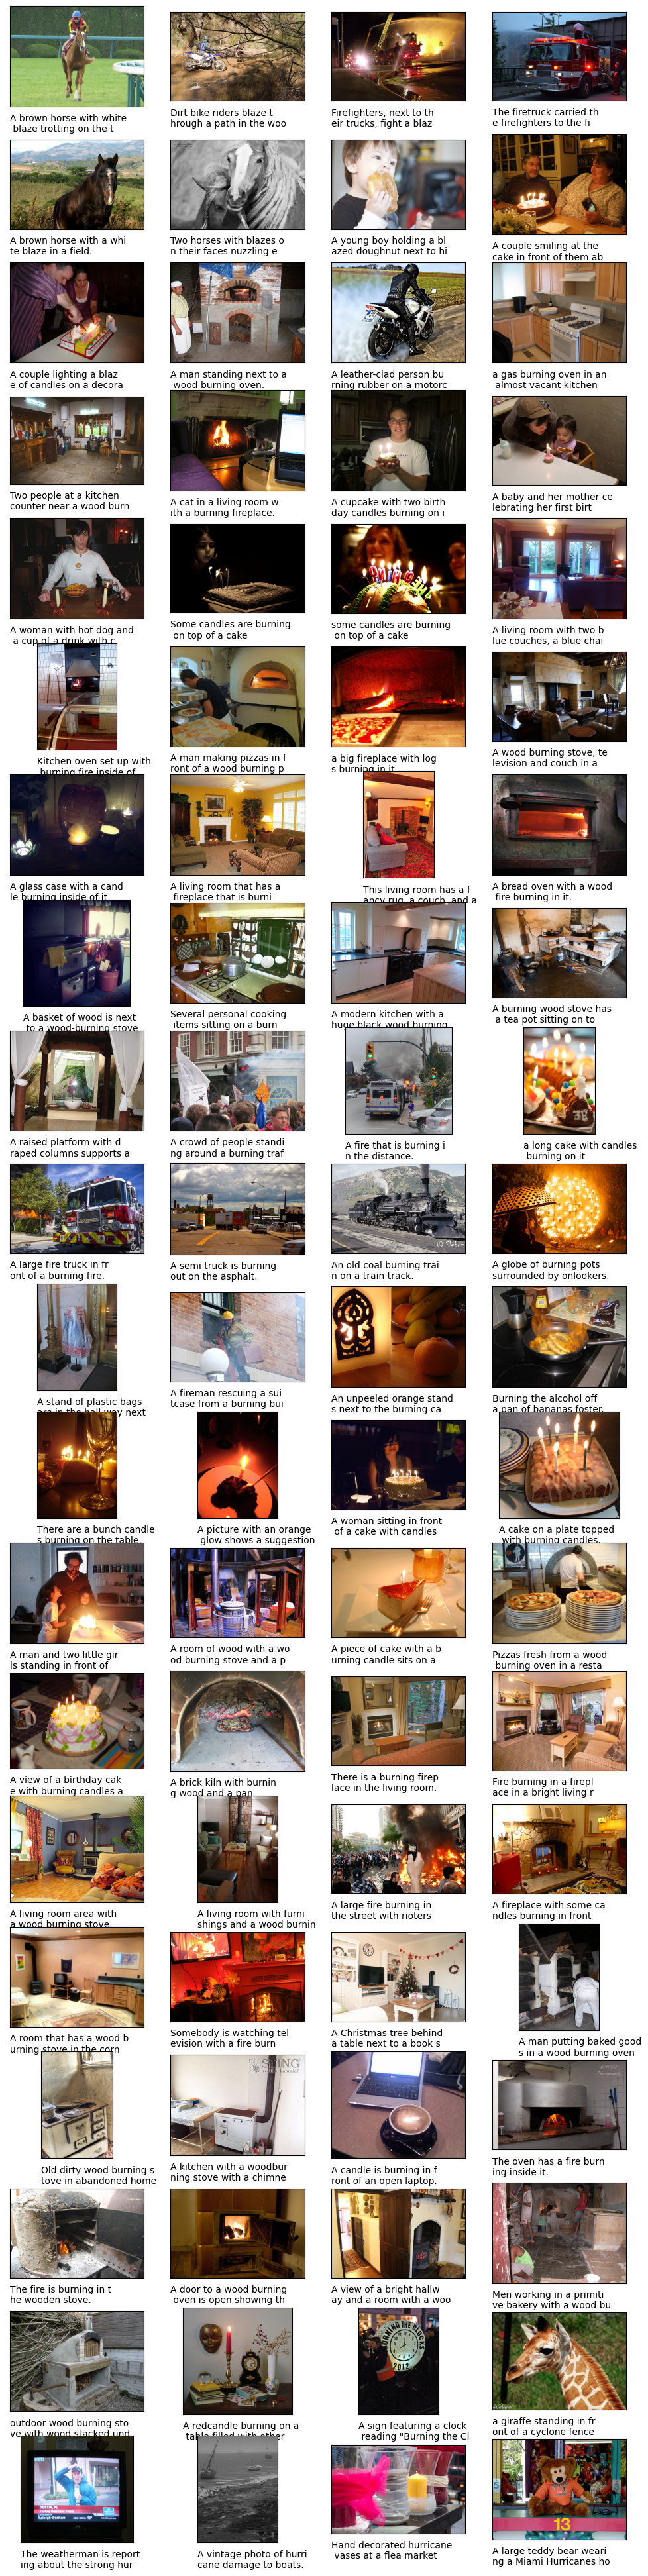

In [243]:
## show img status
plt.figure(figsize=(12,100))
for i in range(len(find)):
    plt.subplot(40,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    k = str(find['image_id'][i]).zfill(12)
    path = "../Data/train2017/" + k +'.jpg'
    im_bgr = cv2.imread(path)
    im_rgb = im_bgr[:, :, ::-1]
    plt.imshow(im_rgb, cmap=plt.cm.binary)
    plt.xlabel(find['caption'][i][:24] + '\n' + find['caption'][i][24:48] , loc='left', fontsize=10)
plt.show()

In [ ]:
image_id = annotations['image_id'][new].value_counts().index
len(image_id)

In [104]:
links = []
for i in range(len(image_id)):
    img_id = images.loc[images['id'] == image_id[i]]
    print(img_id['flickr_url'])

12675    http://farm1.staticflickr.com/26/51654051_a5a2...
Name: flickr_url, dtype: object
52112    http://farm3.staticflickr.com/2679/4303085898_...
Name: flickr_url, dtype: object
78771    http://farm3.staticflickr.com/2723/4326873756_...
Name: flickr_url, dtype: object
65406    http://farm7.staticflickr.com/6143/6043373984_...
Name: flickr_url, dtype: object
66434    http://farm1.staticflickr.com/153/365445209_de...
Name: flickr_url, dtype: object
50884    http://farm9.staticflickr.com/8514/8595648168_...
Name: flickr_url, dtype: object
96725    http://farm8.staticflickr.com/7014/6470002329_...
Name: flickr_url, dtype: object
85515    http://farm4.staticflickr.com/3539/3947726449_...
Name: flickr_url, dtype: object
40701    http://farm5.staticflickr.com/4030/4274629035_...
Name: flickr_url, dtype: object
83670    http://farm8.staticflickr.com/7085/7281820800_...
Name: flickr_url, dtype: object
72532    http://farm4.staticflickr.com/3307/3326334519_...
Name: flickr_url, dtype: object